Course 5, Task 2 - Exploratory Data Analysis

This program will do the following:
    Import and Prepare the data
    Perform Exploratory Data Analysis (EDA)
    Generate graphical representations of the Data
    Perform Correlation and Covariance analysis

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
%matplotlib inline

# Reading Data Set Using Pandas

In [62]:
credit = pd.read_csv('default of credit card clients.csv', header = 1)
creditcopy = credit

# Analysis

In [65]:
# Check first 5 rows of data frame
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# Check last 5 rows of data frame
credit.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [66]:
# Column names
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [67]:
# Remove ID 
credit.drop('ID', axis = 1, inplace=True)
# Rename default payment next month
credit.rename(columns={'default payment next month':'default'}, inplace = True)
credit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [72]:
# Gather 4 values of 'others' in education into one
d = {1:1, 2:2, 3:3, 0:4,5:4,6:4}
credit.EDUCATION = credit.EDUCATION.replace(d)
credit.EDUCATION.describe()

# Attempts:
#if credit.EDUCATION > 3:
#        credit.EDUCATION == 4
#credit.EDUCATION.describe()
#
#w.female.replace(['male', 'female'], [1, 0], inplace=True)
#credit.EDUCATION.replace([0,4,5,6], [4,4,4,4])


count    30000.000000
mean         1.842267
std          0.744494
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: EDUCATION, dtype: float64

In [69]:
# Credit type and shape
bold = '\33[1m'
print(bold + "Credit has type {} and size {}.".format(type(credit),credit.shape))
    #credit_type = type(credit)
    #credit_shape = credit.shape
    #print("Credit has type: {} and size {}".format(credit_type,credit_shape))


Credit has type <class 'pandas.core.frame.DataFrame'> and size (30000, 24).


In [15]:
# Number of defaults
bold = '\33[1m'

print("Number of {}s".format(credit.groupby('default')['default'].count()))
print(bold + "0:No default, 1:Default")

#credit.groupby('default')['default'].count()

Number of default
0    23364
1     6636
Name: default, dtype: int64s
0:No default, 1:Default


In [25]:
# Percentage of defaults
def1 = 100*(credit.groupby('default')['default'].count()) / credit.shape[0]
print(f"Percent of {def1}")
print(bold + "0:No default, 1:Default" + bold)


Percent of default
0    77.88
1    22.12
Name: default, dtype: float64
0:No default, 1:Default


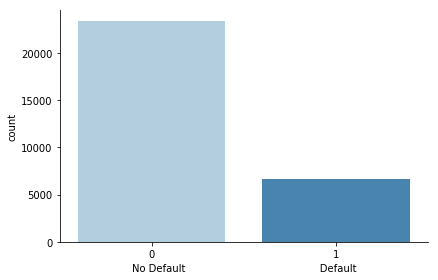

In [33]:
# Plot of the number of defaults
fg = sns.factorplot('default', data = credit, kind = 'count', aspect = 1.5, palette='Blues')
fg.set_xlabels('No Default                                           Default')

In [73]:
# Information about the credit dataset - Payment Status 
credit.iloc[:,[5,6,7,8,9,10,23]].sort_values("default")

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default
14999,0,0,0,0,0,0,0
16193,-1,-1,-1,-1,-1,-1,0
16192,0,0,0,0,0,0,0
26347,2,2,2,2,0,0,0
26348,-2,-2,-2,-2,-2,-2,0
16189,0,-1,0,0,0,0,0
26349,-1,-1,-1,-1,-1,-1,0
16187,2,0,0,0,0,0,0
16186,-1,-1,-2,-2,-2,-2,0
16185,-1,0,0,0,0,0,0


In [29]:
# Show default status by male/female
male = 0
female = 0
for sex in credit.SEX:
    if sex == 1:
        male = male + 1
    elif sex == 2:
        female = female + 1

total = male + female
malep = 100*(male/total)
femalep = 100*(female/total)
print('Male:   {}'.format(male))        
print('Female: {}'.format(female)) 
print('Total:  {}'.format(total))
print(" ")

#print('% Men:  {}'.f )
print(f"%Male:   {malep:1.0f}")
print(f"%Female: {femalep:1.0f}")

#sex=credit['SEX'].describe()[['count','max','mean','min']]
#print("Count ",sex['count'],"\nmin ",sex['min'],"\nmax ",sex['max'])

Male:   11888
Female: 18112
Total:  30000
 
%Male:   40
%Female: 60


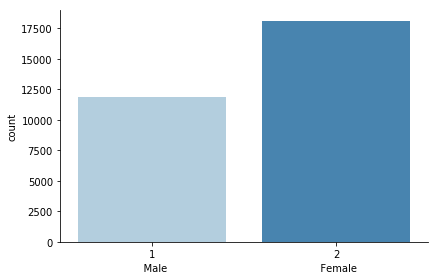

In [34]:
# Number of male/female customers
fg_gender = sns.factorplot('SEX', data = credit, kind = 'count', aspect = 1.5, palette='Blues')
fg_gender.set_xlabels('    Male                                                 Female')


In [47]:
# Number of men and women in default
print(bold + '    Sex:  1: Male, 2: Female' '\n' 'Default:  0: No Default, 1: Default')
credit.groupby(['SEX', 'default'])['SEX'].count()

    Sex:  1: Male, 2: Female
Default:  0: No Default, 1: Default


SEX  default
1    0           9015
     1           2873
2    0          14349
     1           3763
Name: SEX, dtype: int64

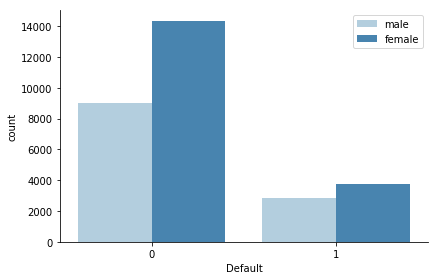

In [48]:
# Plot of number of men and women in default
fg_gender_default = sns.factorplot('default', data = credit, hue = 'SEX', kind = 'count',
                                   aspect = 1.5, palette='Blues', legend=False)
fg_gender_default.set_xlabels('Default')
plt.legend(['male', 'female'])

In [49]:
# Number of defaults grouped for and summed by sex
credit.pivot_table('default', 'SEX', aggfunc = np.sum, margins = True)

,default
SEX,
1,2873
2,3763
All,6636


In [50]:
age_cutpoints = [20,30,40,50,60,70,80]
age = pd.cut(credit.AGE,age_cutpoints)
agecounts = pd.value_counts(age)
# counts is a Series
print(bold + 'Age Range   Total')
print(agecounts)

credit.pivot_table('default', pd.cut(credit.AGE, age_cutpoints), aggfunc = np.sum, margins = True)

Age Range   Total
(20, 30]    11013
(30, 40]    10713
(40, 50]     6005
(50, 60]     1997
(60, 70]      257
(70, 80]       15
Name: AGE, dtype: int64


,default
AGE,
"(20, 30]",2471
"(30, 40]",2189
"(50, 60]",1399
"(40, 50]",504
"(60, 70]",68
"(70, 80]",5
All,6636


In [51]:
# Break credit limit balances into groups
limit_cutpoints = [0,125000,250000,375000,500000,625000,750000,875000,1000000]
limit = pd.cut(credit.LIMIT_BAL, limit_cutpoints)
limitcounts = pd.value_counts(limit)
# counts is a Series
print(limitcounts)

credit.pivot_table('default', pd.cut(credit.LIMIT_BAL,limit_cutpoints), aggfunc = np.sum, margins = True)

(0, 125000]          13812
(125000, 250000]      9471
(250000, 375000]      4312
(375000, 500000]      2199
(500000, 625000]       147
(625000, 750000]        53
(750000, 875000]         5
(875000, 1000000]        1
Name: LIMIT_BAL, dtype: int64


,default
LIMIT_BAL,
"(0, 125000]",3995
"(375000, 500000]",1704
"(125000, 250000]",651
"(250000, 375000]",263
"(625000, 750000]",18
"(500000, 625000]",5
"(875000, 1000000]",0
"(750000, 875000]",0
All,6636


In [112]:
# Break credit limit balances into smaller groups
limit_cutpoints = [0,200000,400000,600000,800000,1000000]
limit = pd.cut(credit.LIMIT_BAL, limit_cutpoints)
limitcounts = pd.value_counts(limit)
# counts is a Series
print(limitcounts)

credit.pivot_table('default', limit, aggfunc = np.sum, margins = True)

(0, 200000]          20378
(200000, 400000]      7818
(400000, 600000]      1725
(600000, 800000]        78
(800000, 1000000]        1
Name: LIMIT_BAL, dtype: int64


,default
LIMIT_BAL,
"(0, 200000]",5219
"(400000, 600000]",1200
"(200000, 400000]",211
"(600000, 800000]",6
"(800000, 1000000]",0
All,6636


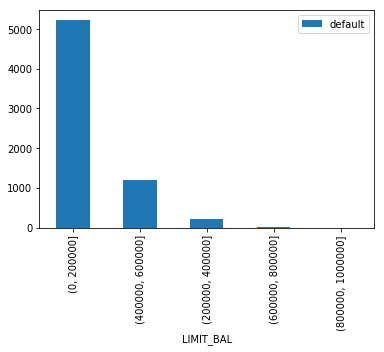

In [97]:
# Plot pivot table with limit balance groups and default
limit_plot = credit.pivot_table('default', index = limit, aggfunc = np.sum, margins = False)
limit_plot.plot(kind='bar')
#births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()


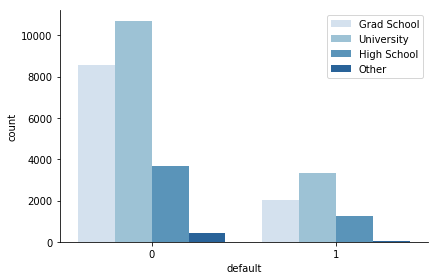

In [103]:
# Plot of education v default
sns.factorplot('default', data = credit, hue='EDUCATION', kind='count', aspect = 1.5, legend=False, palette='Blues')
plt.legend(['Grad School', 'University', 'High School', 'Other'])

In [99]:
first = (5219/20378)*100
second = 1200/7818 *100
third = 211/1725 *100
forth = 6/78 *100
fifth = 0/1 *100
print(bold + 'Percentages of default in credit limit groups:')
print(f'1st group 5,219 defaults or {first:1.0f}%')
print(f'2nd group 1,200 defaults or {second:1.0f}%')
print(f'3rd group   211 defaults or {third:1.0f}%')
print(f'4th group    78 defaults or {forth: 1.0f}%')
print(f'5th group     0 defaults or {fifth: 1.0f}%')



# Break credit limit balances into groups
#limit_cutpoints = [0,125000,250000,375000,500000,625000,750000,875000,1000000]
#limit = pd.cut(credit.LIMIT_BAL, limit_cutpoints)
#limitcounts = pd.value_counts(limit)
# counts is a Series
#print(limitcounts)

#credit.pivot_table('default', limit, aggfunc = np.sum, margins = True)

Percentages of default in credit limit groups:
1st group 5,219 defaults or 26%
2nd group 1,200 defaults or 15%
3rd group   211 defaults or 12%
4th group    78 defaults or  8%
5th group     0 defaults or  0%


In [71]:
# Gather 4 values of 'others' in education into one
#if credit.EDUCATION > 3:
#        credit.EDUCATION == 4
#credit.EDUCATION.describe()

#w.female.replace(['male', 'female'], [1, 0], inplace=True)
#credit.EDUCATION.replace([0,4,5,6], [4,4,4,4])
d = {1:1, 2:2, 3:3, 0:4,5:4,6:4}
credit.EDUCATION = credit.EDUCATION.replace(d)
credit.EDUCATION.describe()


count    30000.000000
mean         1.842267
std          0.744494
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: EDUCATION, dtype: float64

In [101]:
edcounts = pd.value_counts(credit.EDUCATION)
# counts is a Series
print(edcounts)
bold = '\33[1m'
print(bold + "1:Grad, 2:Univ, 3:High School, 4:Other")

credit.pivot_table('default', 'EDUCATION', aggfunc = np.sum, margins = True)

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64
1:Grad, 2:Univ, 3:High School, 4:Other


,default
EDUCATION,
1,2036
2,3330
3,1237
4,33
All,6636


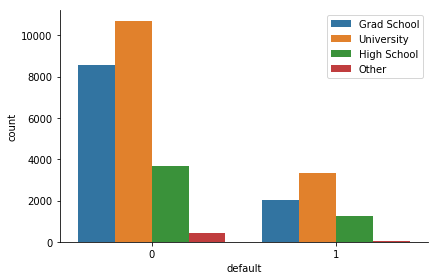

In [102]:
# Plot of education v default
sns.factorplot('default', data = credit, hue='EDUCATION', kind='count', aspect = 1.5, legend=False)
plt.legend(['Grad School', 'University', 'High School', 'Other'])

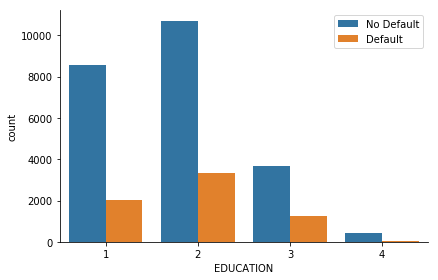

In [104]:
# Another view of education v default
sns.factorplot('EDUCATION', data = credit, hue='default', kind='count', aspect = 1.5, legend=False)
plt.legend(['No Default', 'Default'])

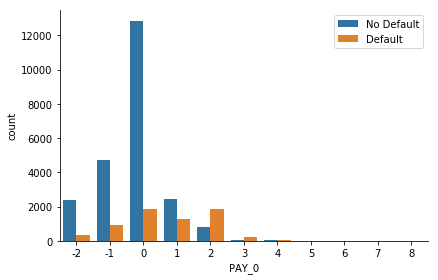

In [105]:
# Another view of repayment status v default
sns.factorplot('PAY_0', data = credit, hue='default', kind='count', aspect = 1.5, legend=False)
plt.legend(['No Default', 'Default'])

In [114]:
# Table showing default in limit balance groups and education levels
table = pd.crosstab(index=[credit.default], columns=[pd.cut(credit.LIMIT_BAL,limit_cutpoints),credit.EDUCATION])
table

LIMIT_BAL (0, 200000]                  (200000, 400000]                \
EDUCATION           1     2     3    4                1    2    3   4   
default                                                                 
0                4436  7549  2892  282              876  492  123  23   
1                1326  2785  1081   27              123   65   22   1   

LIMIT_BAL (400000, 600000]                 (600000, 800000]            \
EDUCATION                1     2    3    4                1   2  3  4   
default                                                                 
0                     3196  2636  657  129               40  23  8  1   
1                      584   477  134    5                3   3  0  0   

LIMIT_BAL (800000, 1000000]  
EDUCATION                 1  
default                      
0                         1  
1                         0

In [117]:
# Table showing default in limit balance groups and education levels
print(bold + '    Sex:  1: Male, 2: Female' '\n' 'Default:  0: No Default, 1: Default')

table = pd.crosstab(index=[credit.default, pd.cut(credit.LIMIT_BAL,limit_cutpoints)], columns=[credit.SEX,credit.EDUCATION])
table

    Sex:  1: Male, 2: Female
Default:  0: No Default, 1: Default


SEX                           1                      2                 
EDUCATION                     1     2     3    4     1     2     3    4
default LIMIT_BAL                                                      
0       (0, 200000]        1741  2919  1130  105  2695  4630  1762  177
        (400000, 600000]   1259   852   259   43  1937  1784   398   86
        (200000, 400000]    430   182    53    8   446   310    70   15
        (600000, 800000]     18    13     3    0    22    10     5    1
        (800000, 1000000]     0     0     0    0     1     0     0    0
1       (0, 200000]         584  1217   485   12   742  1568   596   15
        (400000, 600000]    252   167    49    1   332   310    85    4
        (200000, 400000]     69    24    11    1    54    41    11    0
        (600000, 800000]      1     0     0    0     2     3     0    0

In [118]:
# Change names of columns
table.columns.set_levels(['Male', 'Female'], level = 0, inplace=True)
table.columns.set_levels(['Grad', 'Univ', 'HS', 'Other'], level = 1, inplace=True)
table

SEX                        Male                   Female                  
EDUCATION                  Grad  Univ    HS Other   Grad  Univ    HS Other
default LIMIT_BAL                                                         
0       (0, 200000]        1741  2919  1130   105   2695  4630  1762   177
        (400000, 600000]   1259   852   259    43   1937  1784   398    86
        (200000, 400000]    430   182    53     8    446   310    70    15
        (600000, 800000]     18    13     3     0     22    10     5     1
        (800000, 1000000]     0     0     0     0      1     0     0     0
1       (0, 200000]         584  1217   485    12    742  1568   596    15
        (400000, 600000]    252   167    49     1    332   310    85     4
        (200000, 400000]     69    24    11     1     54    41    11     0
        (600000, 800000]      1     0     0     0      2     3     0     0

In [131]:
# Table showing default in limit balance groups, marriage status and education levels
print(bold + '    Sex:  1: Male, 2: Female' '\n' 'Default:  0: No Default, 1: Default')

table = pd.crosstab(index=[credit.default, pd.cut(credit.LIMIT_BAL,limit_cutpoints)], columns=[credit.MARRIAGE,credit.EDUCATION])
# Change names of columns
table.columns.set_levels(['Married', 'Single', 'Divorced', 'Other'], level = 0, inplace=True)
table.columns.set_levels(['Grad', 'Univ', 'HS', 'Other'], level = 1, inplace=True)
table

    Sex:  1: Male, 2: Female
Default:  0: No Default, 1: Default


MARRIAGE                  Married          Single                   Divorced  \
EDUCATION                    Grad Univ  HS   Grad  Univ    HS Other     Grad   
default LIMIT_BAL                                                              
0       (0, 200000]             1    3  36   1158  3368  1610   129     3251   
        (400000, 600000]        3    2   4   1339  1493   419    74     1845   
        (200000, 400000]        0    0   0    442   303    74    14      432   
        (600000, 800000]        0    0   0     13    12     4     0       27   
        (800000, 1000000]       0    0   0      1     0     0     0        0   
1       (0, 200000]             0    1   4    404  1325   657    12      913   
        (400000, 600000]        0    0   0    287   295    84     4      294   
        (200000, 400000]        0    0   0     77    43    13     1       45   
        (600000, 800000]        0    0   0      1     3     0     0        2   

MARRIAGE                                    Other                 
EDUCATION                  Univ    HS Other  Grad Univ  HS Other  
default LIMIT_BAL                                                 
0       (0, 200000]        4074  1177   147    26  104  69     6  
        (400000, 600000]   1127   229    53     9   14   5     2  
        (200000, 400000]    189    47     9     2    0   2     0  
        (600000, 800000]     11     4     1     0    0   0     0  
        (800000, 1000000]     0     0     0     0    0   0     0  
1       (0, 200000]        1415   393    15     9   44  27     0  
        (400000, 600000]    182    50     1     3    0   0     0  
        (200000, 400000]     22     9     0     1    0   0     0  
        (600000, 800000]      0     0     0     0    0   0     0

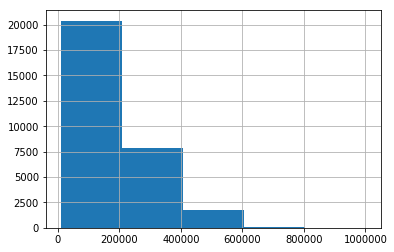

In [120]:
credit['LIMIT_BAL'].hist(bins=5)

In [ ]:
#The code below investigate removing data based on credit limit balances

In [ ]:
df_most4 = pd.DataFrame(df[df['LIMIT_BAL']< 400000])

In [ ]:
df_most5 = pd.DataFrame(df[df['LIMIT_BAL']< 500000])

In [ ]:
df_most5['LIMIT_BAL'].describe()

In [ ]:
print("Std and mean of most5:")
print(df_most5['LIMIT_BAL'].std())
print(df_most5['LIMIT_BAL'].mean())

In [ ]:
out5 = pd.cut(df_most5.LIMIT_BAL, bins=5)
counts5 = pd.value_counts(out5)
# counts is a Series
print(counts5)

In [ ]:
out = pd.cut(df_most5.LIMIT_BAL, bins=8)
counts = pd.value_counts(out)
# counts is a Series
print(counts)

In [ ]:
df_most5['LIMIT_BAL'].describe()

In [ ]:
df_most4['LIMIT_BAL'].describe()

In [ ]:
out4 = pd.cut(df_most4.LIMIT_BAL, bins=5)
counts4 = pd.value_counts(out4)
# counts is a Series
print(counts4)out4 = pd.cut(df_most4.LIMIT_BAL, bins=5)
counts4 = pd.value_counts(out4)
# counts is a Series
print(counts4)

In [ ]:
100-((30000 - 27925) / 30000) * 100

In [ ]:
30000-27925

In [ ]:
credit['LIMIT_BAL'].describe()

In [ ]:
plt.boxplot(credit['LIMIT_BAL'])

In [ ]:
plt.boxplot(df_most4['LIMIT_BAL'])

In [ ]:
plt.boxplot(df_most5['LIMIT_BAL'])

In [ ]:
out

In [ ]:
type(out4)

In [ ]:
out4.describe

In [ ]:
cutpoints = [30,40,50,60,70,80]
age = pd.cut(df.AGE,cutpoints )
agecounts = pd.value_counts(age)
# counts is a Series
print(agecounts)

In [ ]:
# pd.crosstab(data["Credit_History"],data["Loan_Status"],margins=True)
# data.hist(column="ApplicantIncome",by="Loan_Status",bins=30)

pd.crosstab(df['AGE'],df['default'], margins=True)

In [ ]:
cutpoints = [30,40,50,60,70,80]
age = pd.cut(df.AGE,cutpoints )
agecounts = pd.value_counts(age)
defaultcounts = pd.value_counts(credit['default'])
# counts is a Series
print(agecounts)
print(defaultcounts)

In [ ]:
credit['default'] = credit['default payment next month']
credit.columns
credit['default']

In [ ]:
credit.drop('default payment next month', axis = 1, inplace=True)

In [ ]:
credit.columns

In [ ]:
credit.hist()

In [ ]:
credit.groupby('default').hist()

EXPLORATORY DATA ANALYSIS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
header = credit.dtypes.index
print(header)

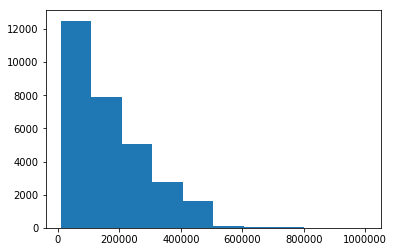

In [121]:
plt.hist(credit['LIMIT_BAL'])
plt.show()

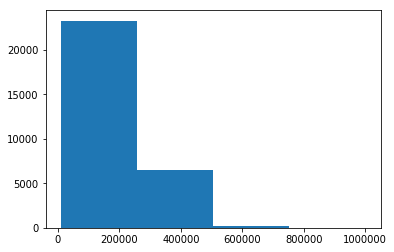

In [122]:
plt.hist(credit['LIMIT_BAL'],bins=4)
plt.show()

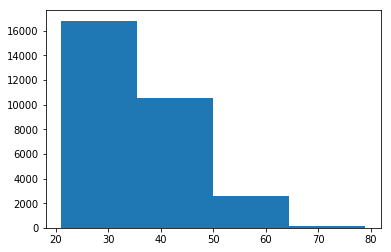

In [123]:
plt.hist(credit['AGE'],bins=4)
plt.show()

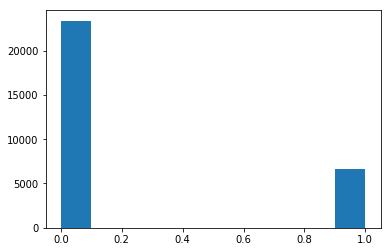

In [127]:
plt.hist(credit['default'])
plt.show()

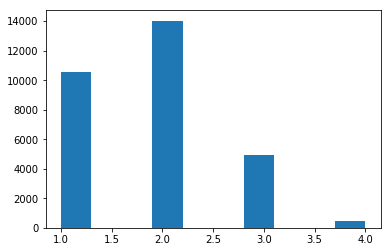

In [128]:
plt.hist(credit['EDUCATION'])
plt.show()

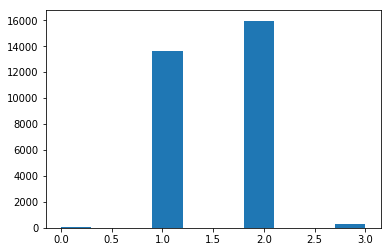

In [129]:
plt.hist(credit['MARRIAGE'])
plt.show()

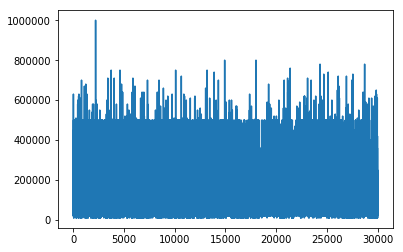

In [130]:
plt.plot(credit['LIMIT_BAL'])
plt.show()

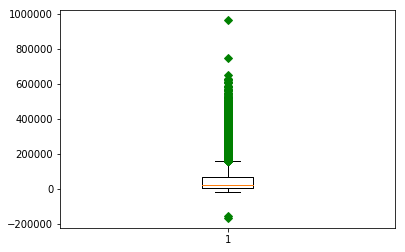

In [126]:
A = credit['BILL_AMT1']
plt.boxplot(A, 0, 'gD')
plt.show()

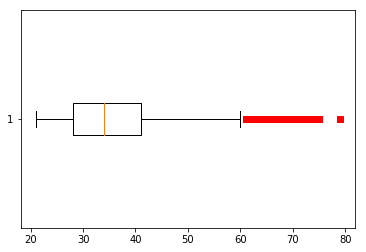

In [139]:
B = credit['AGE']
plt.boxplot(B, 0, 'rs',0)
plt.show()

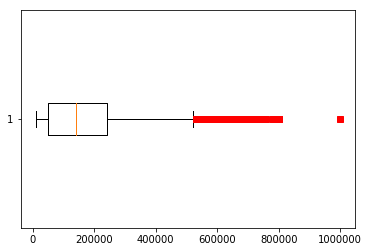

In [138]:
C = credit['LIMIT_BAL']
plt.boxplot(C, 0, 'rs',0)
plt.show()

In [136]:
corrMat = credit.corr()
print(corrMat)

           LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0  \
LIMIT_BAL   1.000000  0.024755  -0.231088 -0.108139  0.144713 -0.271214   
SEX         0.024755  1.000000   0.013627 -0.031389 -0.090874 -0.057643   
EDUCATION  -0.231088  0.013627   1.000000 -0.149134  0.182434  0.112593   
MARRIAGE   -0.108139 -0.031389  -0.149134  1.000000 -0.414170  0.019917   
AGE         0.144713 -0.090874   0.182434 -0.414170  1.000000 -0.039447   
PAY_0      -0.271214 -0.057643   0.112593  0.019917 -0.039447  1.000000   
PAY_2      -0.296382 -0.070771   0.129703  0.024199 -0.050148  0.672164   
PAY_3      -0.286123 -0.066096   0.122425  0.032688 -0.053048  0.574245   
PAY_4      -0.267460 -0.060173   0.116531  0.033122 -0.049722  0.538841   
PAY_5      -0.249411 -0.055064   0.104088  0.035629 -0.053826  0.509426   
PAY_6      -0.235195 -0.044008   0.088986  0.034345 -0.048773  0.474553   
BILL_AMT1   0.285430 -0.033642   0.016597 -0.023472  0.056239  0.187068   
BILL_AMT2   0.278314 -0.0

{'whiskers': [<matplotlib.lines.Line2D at 0x1ad37ed5c88>,
 'caps': [<matplotlib.lines.Line2D at 0x1ad37ed9588>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ad37ed5b38>,
 'medians': [<matplotlib.lines.Line2D at 0x1ad37ed9dd8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ad37edf240>,
 'means': []}

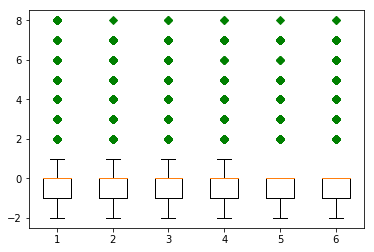

In [137]:
data = [credit['PAY_0'],credit['PAY_2'], credit['PAY_3'], credit['PAY_4'], credit['PAY_5'], credit['PAY_6']]
# multiple box plots on one figure
#B = credit['AGE']
plt.boxplot(data, 0,'gD')

#plt.figure()
#plt.boxplot(data)


In [133]:
covMat = credit.cov()
print(covMat)

              LIMIT_BAL          SEX     EDUCATION     MARRIAGE  \
LIMIT_BAL  1.683446e+10  1571.050630 -22322.227579 -7323.669658   
SEX        1.571051e+03     0.239247      0.004962    -0.008014   
EDUCATION -2.232223e+04     0.004962      0.554272    -0.057954   
MARRIAGE  -7.323670e+03    -0.008014     -0.057954     0.272452   
AGE        1.730767e+05    -0.409726      1.251988    -1.992764   
PAY_0     -3.954593e+04    -0.031685      0.094202     0.011683   
PAY_2     -4.603765e+04    -0.041442      0.115604     0.015122   
PAY_3     -4.443225e+04    -0.038694      0.109088     0.020421   
PAY_4     -4.057181e+04    -0.034411      0.101430     0.020213   
PAY_5     -3.667056e+04    -0.030521      0.087814     0.021074   
PAY_6     -3.509308e+04    -0.024754      0.076186     0.020616   
BILL_AMT1  2.727020e+09 -1211.694332    909.885257  -902.154685   
BILL_AMT2  2.570130e+09 -1085.595467    634.798683  -802.517866   
BILL_AMT3  2.548533e+09  -833.207432    346.636738  -901.67908